In [27]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn import linear_model
import random

In [28]:
# Setting
nodeCount = 6

In [29]:
nodeCount = nodeCount - nodeCount % 2
nodes = []
links = []
lastNode = chr(65+nodeCount)
for i in range (nodeCount):
    nodes.append(chr(65+i)) # 65 : A
G = nx.DiGraph()
# RING network
for i in range( nodeCount ):
    links.append( (nodes[i], nodes[(i+1)%nodeCount]) )
    # links.append( (nodes[i], nodes[(i+nodeCount-1)%nodeCount]) )
# STAR network
nodes.append( lastNode )
for i in range( nodeCount ):
    links.append( (nodes[i], lastNode) )
    links.append( (lastNode, nodes[i]) )
# Implement network
G.add_nodes_from(nodes)
G.add_edges_from(links)

In [30]:
# node name
names = {}
for name in nodes:
    names[name] = name
# link name
linknames = {}
for link in links:
    linknames[link] = ''
# source-receiver (origin-destination) list
od_list = []
for i in range(nodeCount):
    od_list.append((nodes[i], nodes[int((i+nodeCount/2)%nodeCount)]))

{('A', 'B'): Text(-0.47462705417348167, 0.6629778765632082, ''),
 ('B', 'C'): Text(-0.011047643130867903, 0.7046840405834058, ''),
 ('C', 'D'): Text(0.5406883921605625, 0.12855495832663066, ''),
 ('D', 'E'): Text(0.6594537519018864, -0.5396399312582336, ''),
 ('E', 'F'): Text(-0.07910785509370702, -0.7612174739545547, ''),
 ('F', 'A'): Text(-0.6614526258776446, -0.1347287483898881, ''),
 ('A', 'G'): Text(-0.4014290974498849, 0.1326625156279244, ''),
 ('G', 'A'): Text(-0.4014290974498849, 0.1326625156279244, ''),
 ('B', 'G'): Text(-0.047104922510344274, 0.4696846390647162, ''),
 ('G', 'B'): Text(-0.047104922510344274, 0.4696846390647162, ''),
 ('C', 'G'): Text(0.062150313592728865, 0.174368679648122, ''),
 ('G', 'C'): Text(0.062150313592728865, 0.174368679648122, ''),
 ('D', 'G'): Text(0.5046311127810862, -0.10644444319205895, ''),
 ('G', 'D'): Text(0.5046311127810862, -0.10644444319205895, ''),
 ('E', 'G'): Text(0.18091567333405273, -0.49382620993674226, ''),
 ('G', 'E'): Text(0.180915

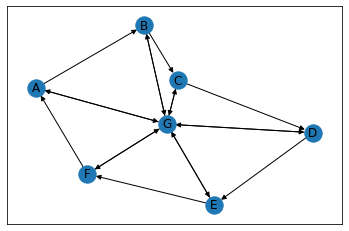

In [31]:
pos = nx.spring_layout(G, k=0.8)
nx.draw_networkx(G, pos, labels=names)
nx.draw_networkx_edge_labels(G, pos, edge_labels=linknames)

In [32]:
# 1000パケット送信したときのパケット通過数 (the number of packets passed when 1000 packets are transmitted)
od_success = {}
for od in od_list:
    od_success[ od ] = 900
print(od_success)

{('A', 'D'): 900, ('B', 'E'): 900, ('C', 'F'): 900, ('D', 'A'): 900, ('E', 'B'): 900, ('F', 'C'): 900}


In [33]:
# ベクトル\hat{y}をy_e2eとして作成 (generate vector \hat{y} as y_e2e)
y = np.zeros(len(od_list)) # 初期化 (initialization)
for i in range(len(od_list)):
    print(od_list[i], od_success[od_list[i]])
    y[i] = od_success[od_list[i]]
y_e2e = -np.log(y/1000)

('A', 'D') 900
('B', 'E') 900
('C', 'F') 900
('D', 'A') 900
('E', 'B') 900
('F', 'C') 900


In [34]:
y

array([900., 900., 900., 900., 900., 900.])

In [35]:
y_e2e

array([0.10536052, 0.10536052, 0.10536052, 0.10536052, 0.10536052,
       0.10536052])

In [36]:
A = np.zeros((len(od_list), len(links))) # 初期化 (initialization)
for i in range(len(od_list)):
    print(od_list[i])
    paths = list(nx.all_simple_paths(G, od_list[i][0], od_list[i][1]))
    idx = random.randint(0, len(paths)-1)
    # path = nx.shortest_path(G, od_list[i][0], od_list[i][1])
    path = paths[idx]
    print(path)
    for j in range(len(path)-1):
        k = links.index((path[j], path[j+1]))
        A[i,k] = 1

('A', 'D')
['A', 'B', 'G', 'D']
('B', 'E')
['B', 'C', 'D', 'G', 'E']
('C', 'F')
['C', 'D', 'G', 'F']
('D', 'A')
['D', 'G', 'F', 'A']
('E', 'B')
['E', 'F', 'G', 'A', 'B']
('F', 'C')
['F', 'A', 'B', 'C']


In [37]:
A

array([[1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0.],
       [1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [38]:
# 関数csを定義 (define function cs)
def cs(X, Y, alpha, positive):
    clf = linear_model.Lasso(alpha=alpha, fit_intercept=False, normalize=False, positive=positive)
    clf.fit(X,Y)
    return clf.coef_

[0.10340739 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.10340739 0.         0.         0.         0.         0.        ]
[0.10226012 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.10226012 0.         0.         0.         0.         0.        ]
[0.10043895 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.10043895 0.         0.         0.         0.         0.        ]
[0.09754802 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.09754802 0.         0.         0.         0.         0.        ]
[0.09295894 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.09295894 0.         0.         0.         0.         0.        ]
[0.08567425 0.         0.         0.         0.         0.
 0.        

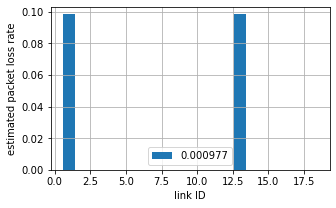

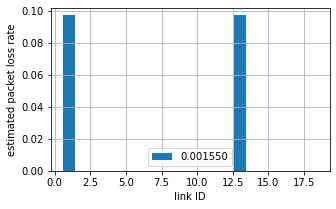

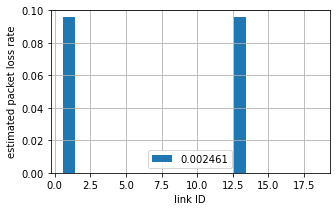

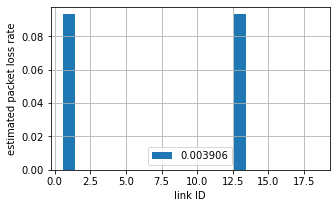

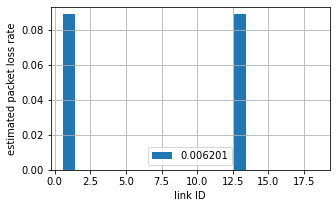

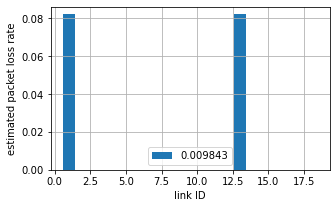

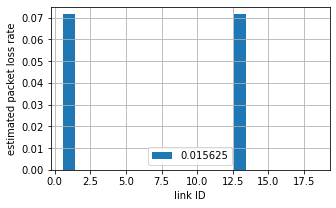

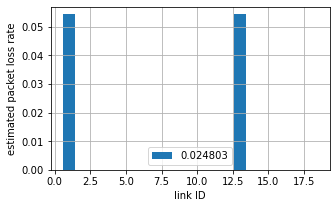

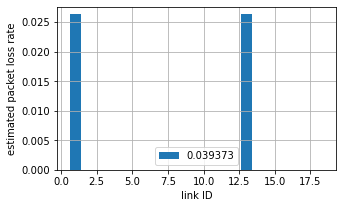

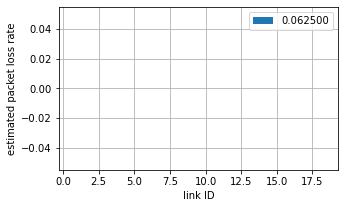

In [39]:
# csのXにAを,Yにy_e2eを代入して\hat{x}を計算.estが\hat{x} (Calculate \hat{x} by substituting A for X and y_e2e for Y in cs. est is \hat{x})
# alphaを変えて実験 (Experiment by changing alpha)
for ALPHA in np.logspace(-10, -4, 10, base=2):
    est = cs(A, y_e2e, alpha=ALPHA, positive=True)
    print(est)
    plt.figure(figsize=(5,3))
    plt.grid()
    plt.bar(range(1, len(est)+1), 1 - np.exp(-est), label='%f' %ALPHA )
    plt.legend()
    plt.xlabel('link ID')
    plt.ylabel('estimated packet loss rate')